# Importando variáveis

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Anotações

- no maximo duas vezes o pinãho
- 4 molas ou mais
- 1 mm para soltar

# Embreagem

In [141]:
r_i_eval = np.linspace(10e-3, 70e-3, num=15)

# constantes embragem

Pot = 7.5e3
w = 900 / 60
torque = Pot / (w * 2 * np.pi)
f = 0.45
p_max = 2070e3
b = 3e-3
rho_emb = 7070
r_pinhao = (75e-3)/2

r_i_list = []
r_o_list = []
N_list = []
P_list = []
F_emb_list = []
Perim_list = []

for r_i in r_i_eval:


    # calculo de embreagem

    N = 2

    r_o = r_i * (3) ** 0.5

    while r_o > 2 * r_pinhao:

        r_o = (torque / (np.pi * p_max * f * r_i * N) + r_i ** 2) ** 0.5

        N += 1

    F_emb = 2 * np.pi * p_max * r_i * (r_o - r_i)

    P = (np.pi * r_o ** 2 - np.pi * r_i ** 2) * b * rho_emb * (N * 2 - 1)

    r_i_list.append(r_i)
    r_o_list.append(r_o)
    N_list.append(N)
    P_list.append(P)
    F_emb_list.append(F_emb)
    Perim_list.append(2*np.pi*((r_o-r_i)/2 + r_i))

df_emb = pd.DataFrame(
    np.vstack((
        r_i_list, 
        r_o_list, 
        N_list,
        P_list, 
        F_emb_list,
        Perim_list,
        )).T, 
        columns=["r_i", "r_o", "N","P","F","Perim"]
)

df_emb

,r_i,r_o,N,P,F,Perim
0,0.010000,0.017321,2.0,0.039980,952.119452,0.085830
1,0.014286,0.024744,2.0,0.081592,1943.100922,0.122614
2,0.018571,0.032167,2.0,0.137890,3283.840558,0.159398
3,0.022857,0.039590,2.0,0.208875,4974.338360,0.196183
4,0.027143,0.047013,2.0,0.294546,7014.594329,0.232967
5,0.031429,0.054436,2.0,0.394904,9404.608463,0.269751
6,0.035714,0.061859,2.0,0.509948,12144.380763,0.306535
7,0.040000,0.069282,2.0,0.639679,15233.911229,0.343320
8,0.044286,0.047626,3.0,0.102288,1924.006038,0.288749
9,0.048571,0.051372,3.0,0.093263,1769.384157,0.313982


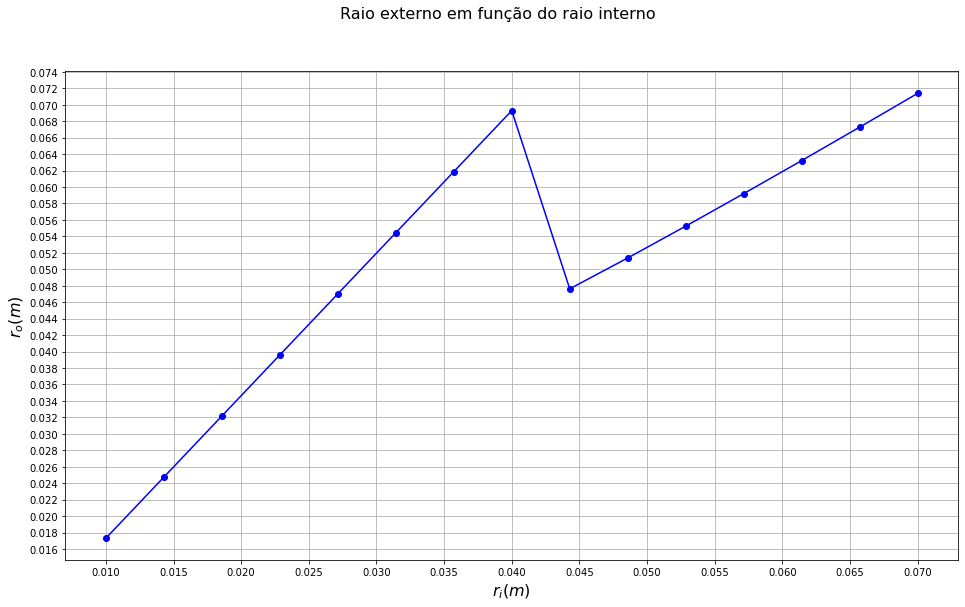

In [6]:
fig = plt.figure(figsize=[16, 9])
fig.suptitle('Raio externo em função do raio interno', fontsize=16)

ax = fig.add_subplot(1,1,1)

# Plotando 2D

ax.plot(df_emb.r_i,
    df_emb.r_o,
    'o', 
    df_emb.r_i, 
    df_emb.r_o, 
    '-',
    color='b',
)

ax.locator_params(axis='y', nbins=30)
ax.locator_params(axis='x', nbins=20)
ax.set_ylabel('$r_o (m)$', fontsize=16)
ax.set_xlabel('$r_i (m)$', fontsize=16)
ax.grid()

plt.show()

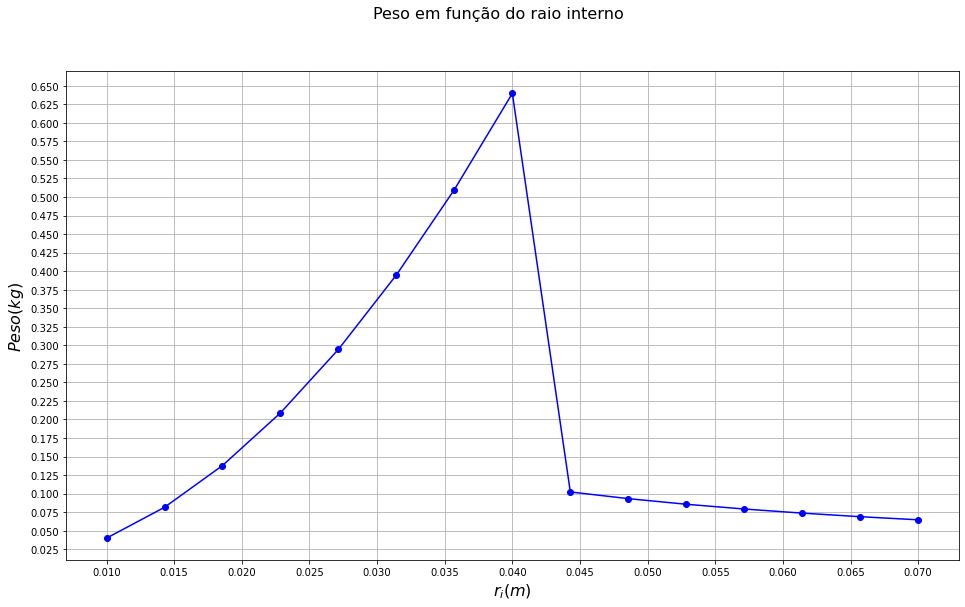

In [7]:
fig = plt.figure(figsize=[16, 9])
fig.suptitle('Peso em função do raio interno', fontsize=16)

ax = fig.add_subplot(1,1,1)

# Plotando 2D

ax.plot(df_emb.r_i,
    df_emb.P,
    'o', 
    df_emb.r_i, 
    df_emb.P, 
    '-',
    color='b',
)

ax.locator_params(axis='y', nbins=30)
ax.locator_params(axis='x', nbins=20)
ax.set_ylabel('$Peso (kg)$', fontsize=16)
ax.set_xlabel('$r_i (m)$', fontsize=16)
ax.grid()

plt.show()

# Mola

In [109]:
# constantes
r_i_ideal = 0.07
F = float(df_emb.loc[df_emb.r_i == r_i_ideal].F.values)
Su = 1250e6
Su_lim = 0.80
Su_vida_inf = 0.62
Sy_lim = 0.65
delta_p = 1e-3
G = 79e9
E = 207e9
rho = 7700


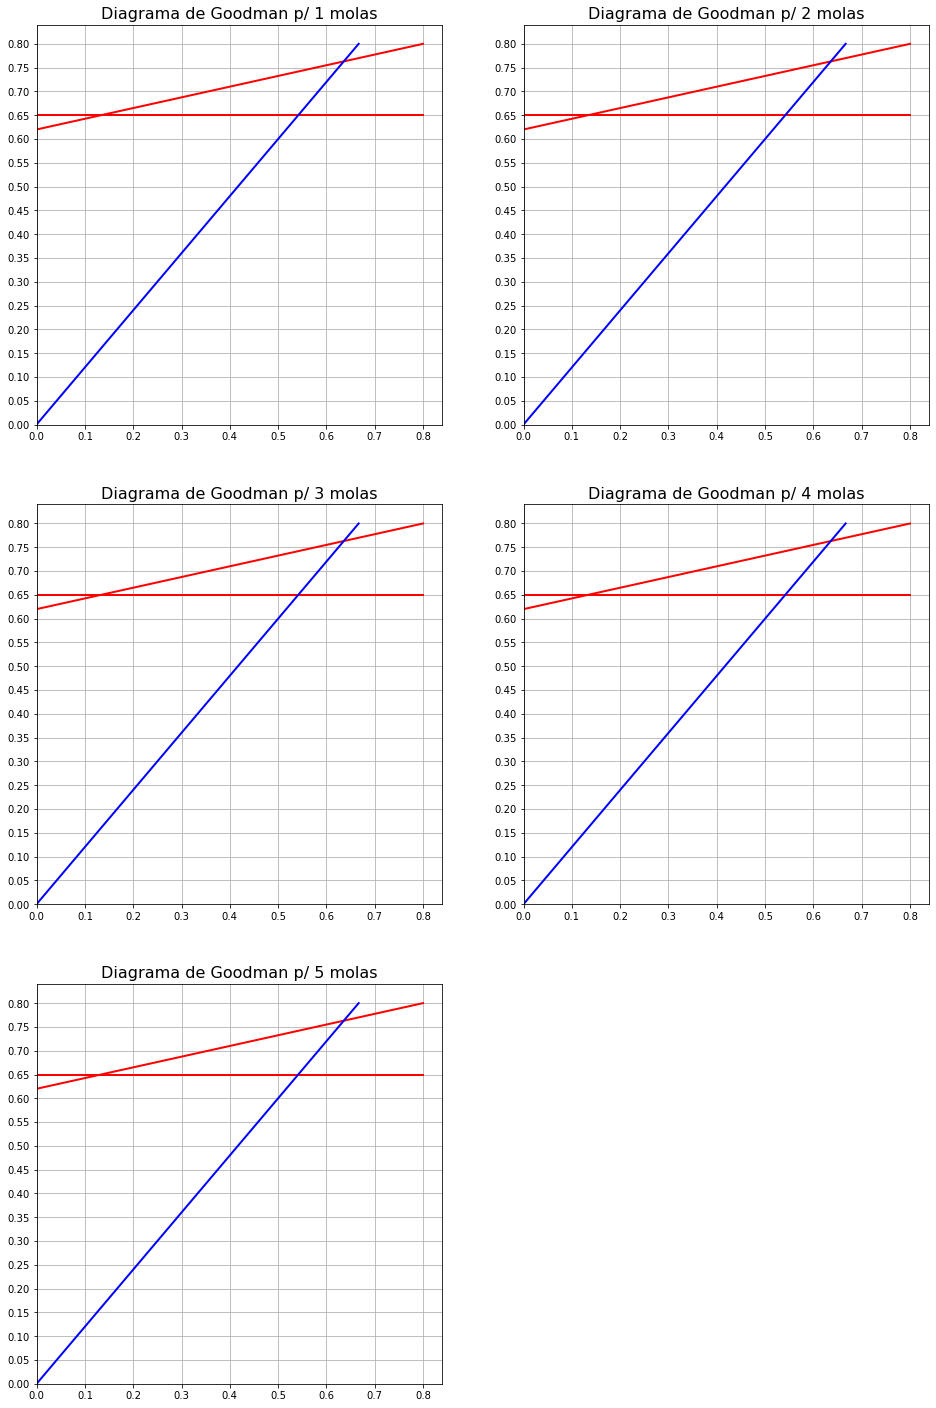

In [110]:
n_molas_list = np.linspace(4,8,num=5,dtype=int)

# plotagem diagrama de goodman

fig = plt.figure(figsize=[16, 25])

for i,n_molas in enumerate(n_molas_list):
    
    F_min = F / n_molas

    F_max = F_min * 1.2

    Fs = 1.1 * F_max

    linha_sobrecarga_1 = np.array(
        ([0,Su_vida_inf],
        [Su_lim,Su_lim])
    ) 

    linha_sobrecarga_2 = np.array(
        ([0,Sy_lim],
        [Su_lim,Sy_lim])
    ) 

    linha_carga = np.array(
        ([0,0],
        [Su_lim*(F_min/F_max),Su_lim])
    )


    # Plotando 2D

    ax = fig.add_subplot(3, 2, (i+1) )

    ax.set_title('Diagrama de Goodman p/ {} molas'.format(i+1), fontsize=16)

    ax.plot(linha_sobrecarga_1[:,0], linha_sobrecarga_1[:,1], 'r', linewidth=2)
    ax.plot(linha_sobrecarga_2[:,0], linha_sobrecarga_2[:,1], 'r', linewidth=2)
    ax.plot(linha_carga[:,0], linha_carga[:,1], 'b', linewidth=2)

    ax.set_xlim(0)
    ax.set_ylim(0)
    ax.locator_params(axis='y', nbins=20)
    ax.grid()

plt.show()


In [142]:
# encontrando tensão limite

tensao_max_teorico = 0.65 * Su

f_seguranca = 0.1

f_mola_solida = 0.1

tensao_max = tensao_max_teorico/(1+f_seguranca)/(1+f_mola_solida)

print('{:.2e} MPa'.format(tensao_max/1e6))

6.71e+02 MPa


In [143]:
k = (F_max-F_min)/delta_p
k

15635.736691734364

In [144]:
# estabelecendo um diãmetro alvo

C_t = 5

Kw = (4*C_t - 1)/(4*C_t - 4) + 0.615/C_t

d_alvo = (8*F_max*C_t*Kw/(np.pi*tensao_max))**0.5

print('{:.2e} mm'.format(d_alvo*1e3))

2.07e+00 mm


In [145]:
## converge C

def C_converge(C_t,d,tau,F_max,verbose=False):


    while True:

        Ks = (4*C_t - 1)/(4*C_t - 4) + 0.675/C_t

        C_p = tau*np.pi*d**2/(8*F_max*Ks)

        error = ((C_p-C_t)**2)**0.5

        C_t = (C_p+C_t)/2

        if verbose:
            print("C_t",C_t)
            print("C_p",C_p)
            print("error",error)
            print('*'*12)

        if error <= C_t*0.1:
            return C_t

In [147]:
d_mm_list = np.linspace(2.5,5,num=6,dtype=float)

C_list = []
D_list = []
Nt_list = []
Lf_D_list = []
delta_Lf_list = []
V_list = []
P_list = []
fn_list = []
d_list = []
N_list = []
Diam_list = []

for n_molas in n_molas_list:
    for i,d_mm in enumerate(d_mm_list):

        F_min = F / n_molas

        F_max = F_min * 1.2

        Fs = 1.5 * F_max

        d = d_mm*1e-3

        C = C_converge(C_t,d,tensao_max,F_max)

        D = C * d

        N = d * G/(8 * C**3 * k)

        N_t = N + 2

        Ls = N_t * d

        delta = Fs/k

        L_f = Ls + delta

        Lf_D = L_f/D


        delta_Lf = delta/L_f


        V = (np.pi * d **2 / 4) * 2*np.pi *D/2

        P += V * rho * n_molas

        fn = 353e3*d/(N*D**2) * 60

        C_list.append(C)
        D_list.append(D)
        Nt_list.append(N_t)
        Lf_D_list.append(Lf_D)
        delta_Lf_list.append(delta_Lf)
        V_list.append(V)
        P_list.append(P)
        fn_list.append(fn)
        d_list.append(d)
        N_list.append(n_molas)
        Diam_list.append(D*n_molas)

df = pd.DataFrame(np.vstack((
        d_list,
        C_list,
        N_list,
        Diam_list,
        D_list,
        Nt_list,
        Lf_D_list,
        delta_Lf_list,
        P_list,
        fn_list,
    )).T,columns=[
            'd',
            'C',
            'N',
            'Diam',
            'D',
            'Nt',
            'Lf/D',
            'delta/Lf',
            'P',
            'fn',
        ], dtype=float)

df


,d,C,N,Diam,D,Nt,Lf/D,delta/Lf,P,fn
0,0.0025,2.831232,4.0,0.028312,0.007078,71.571642,30.365450,0.167497,3.939641,1.519157e+07
1,0.0030,4.891031,4.0,0.058692,0.014673,18.193431,6.173225,0.397437,3.949677,1.822490e+07
2,0.0035,6.567605,4.0,0.091946,0.022987,9.803076,3.058770,0.512013,3.971076,1.797952e+07
3,0.0040,9.125178,4.0,0.146003,0.036501,5.324717,1.569801,0.628285,4.015459,1.912619e+07
4,0.0045,12.231975,4.0,0.220176,0.055044,3.552893,0.944483,0.692467,4.100167,2.025717e+07
5,0.0050,15.424661,4.0,0.308493,0.077123,2.860482,0.652234,0.715671,4.246693,2.069106e+07
6,0.0025,4.139553,5.0,0.051744,0.010349,24.258624,8.643112,0.321980,4.252838,2.221164e+07
7,0.0030,6.011148,5.0,0.090167,0.018033,10.723039,3.380892,0.472370,4.268255,2.239866e+07
8,0.0035,8.689804,5.0,0.152072,0.030414,5.368658,1.564734,0.605165,4.303648,2.378927e+07
9,0.0040,12.064132,5.0,0.241283,0.048257,3.438767,0.881851,0.676770,4.376994,2.528618e+07


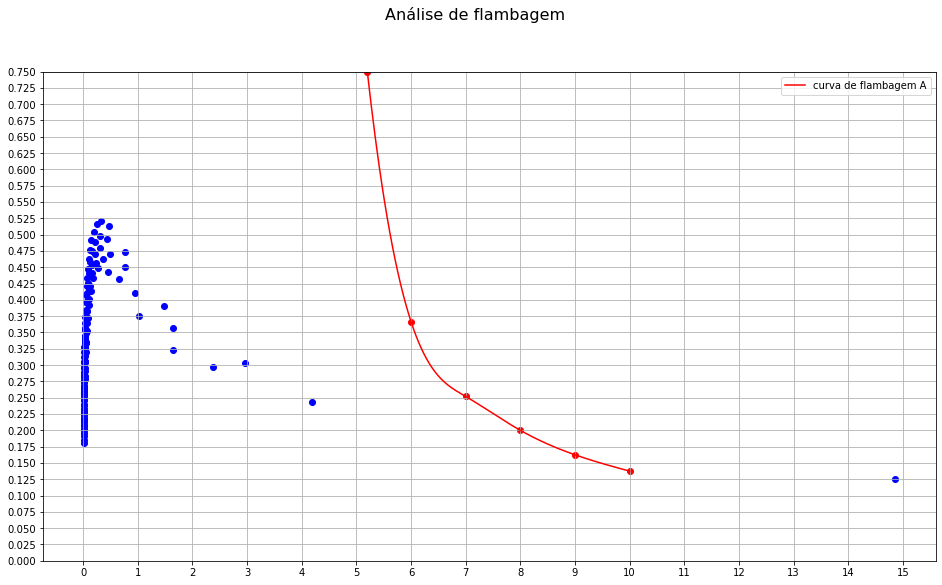

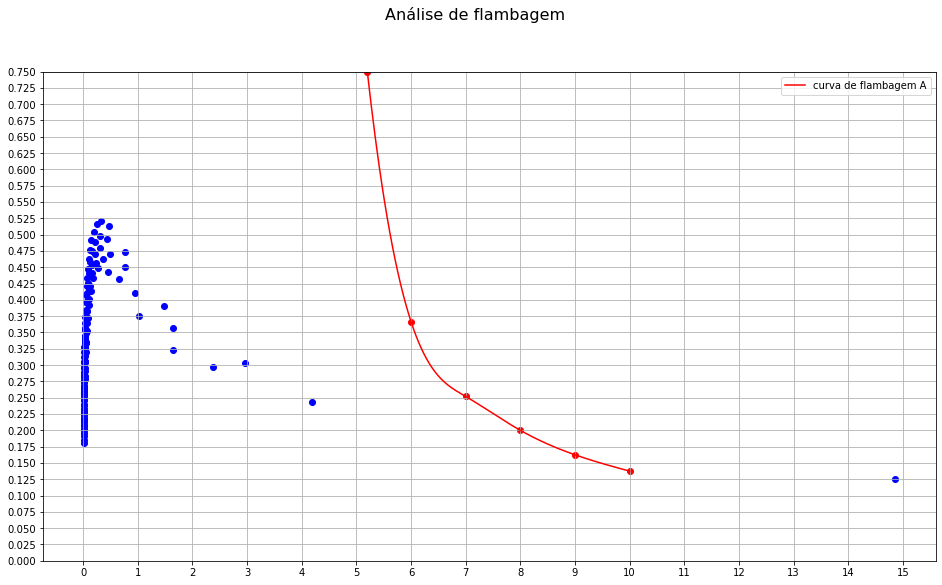

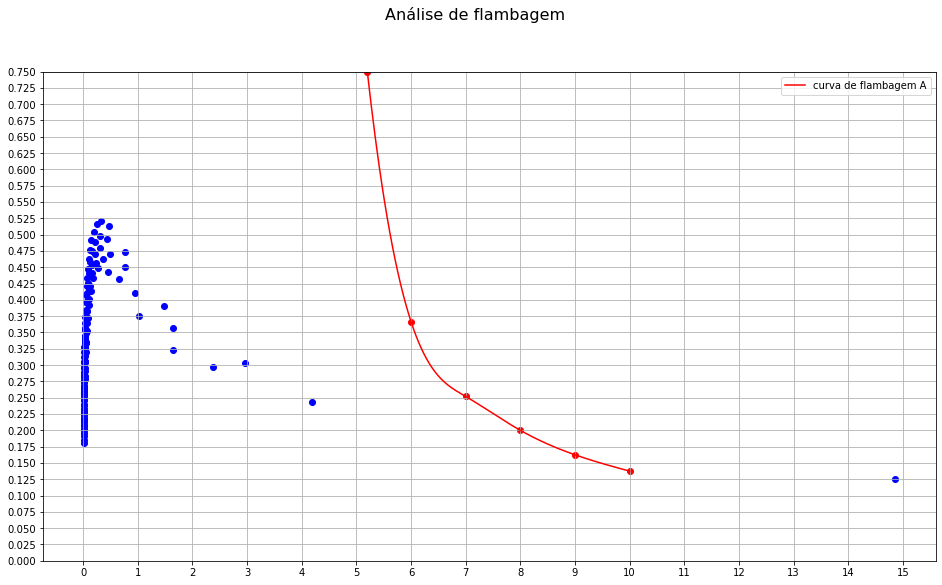

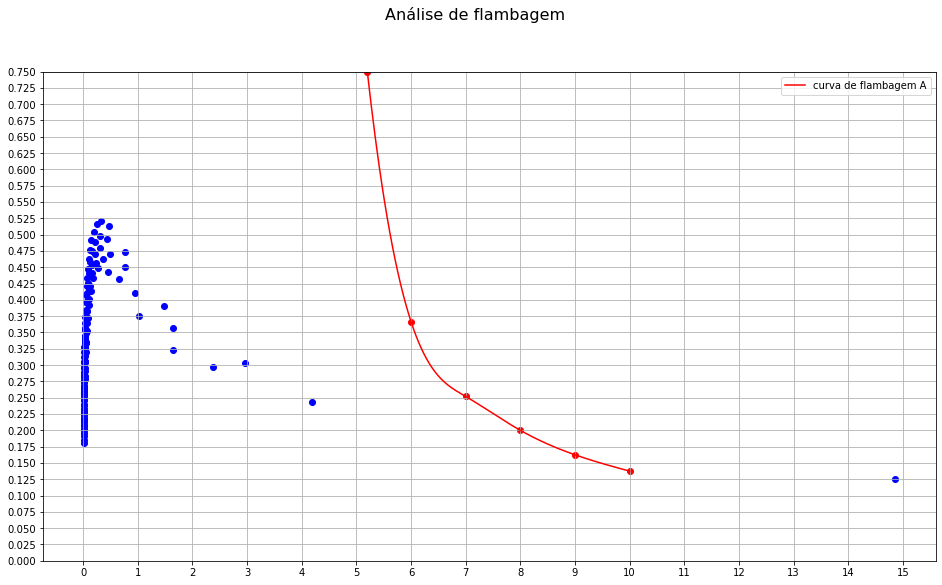

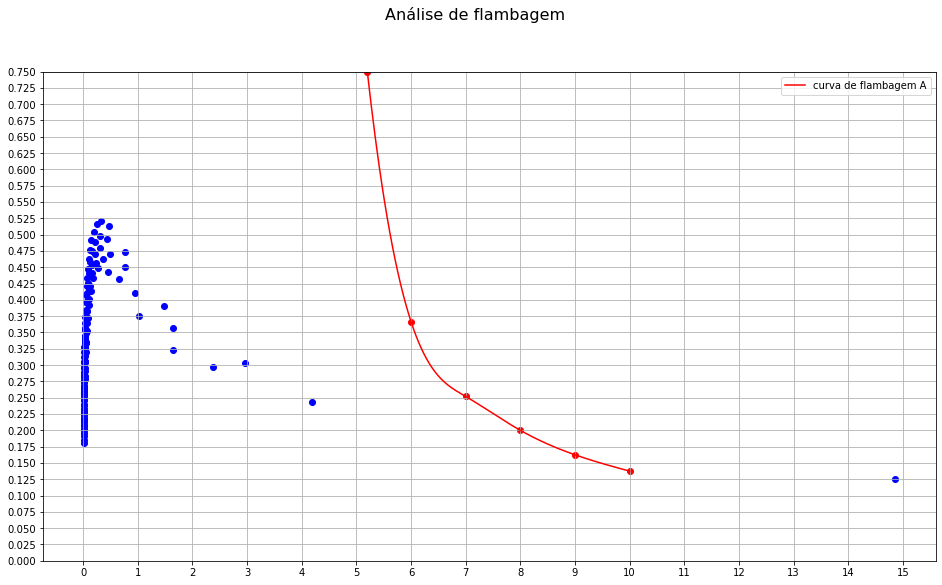

In [136]:
# Análise de flambagem

for n_molas in n_molas_list:
    fig = plt.figure(figsize=[16, 9])
    fig.suptitle('Análise de flambagem', fontsize=16)

    flambagem_seed = np.array((
        [5.2,0.75],
        [10,0.1375],
        [9,0.1625],
        [6,0.3667],
        [8,0.2],
        [7,0.252]
    ))


    f2 = interp1d(
        flambagem_seed[:,0], 
        flambagem_seed[:,1],
        kind='cubic'
    )

    flambagem_eval = np.linspace(
        min(flambagem_seed[:,0]),
        max(flambagem_seed[:,0]),
        num=200
    )
    curva_A = f2(flambagem_eval)   # use interpolation function returned by `interp1d`


    ax = fig.add_subplot(1, 1, 1)


    ax.plot(
        flambagem_eval, 
        curva_A, 
        '-',
        color='r',
        label='curva de flambagem A'
    )

    ax.scatter(
        flambagem_seed[:,0], 
        flambagem_seed[:,1], 
        color='r', )

    ax.set_ylim(0,0.75)
    ax.locator_params(axis='y', nbins=30)
    ax.locator_params(axis='x', nbins=30)
    ax.grid()

    ax.scatter(
        df['Lf/D'],
        df['delta/Lf'], 
        color='b',)

    ax.legend()

    plt.show()

In [ ]:
fig = plt.figure(figsize=[16, 9])
fig.suptitle('Peso em função do raio interno', fontsize=16)

ax = fig.add_subplot(1,1,1)
for n_molas in n_molas_list:

# Plotando 2D

ax.plot(df_emb.r_i,
    df_emb.P,
    'o', 
    df_emb.r_i, 
    df_emb.P, 
    '-',
    color='b',
)

ax.locator_params(axis='y', nbins=30)
ax.locator_params(axis='x', nbins=20)
ax.set_ylabel('$Peso (kg)$', fontsize=16)
ax.set_xlabel('$r_i (m)$', fontsize=16)
ax.grid()

plt.show()